# Required assignment 22.2: Conducting a k-means clustering in Python

K-means clustering is a type of unsupervised learning that is used when you have unlabelled data (i.e. data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable k. The algorithm works iteratively to assign each data point to one of the k groups based on the features that are provided. Data points are clustered based on the similarity in features. The results of the k-means clustering algorithm are as follows:

1. The centroids of the k clusters, which can be used to label new data

2. Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyse the groups that have formed organically.

Each centroid of a cluster is a collection of feature values that define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret the kind of group each cluster represents.

### Visualising crimes in Chicago using clustering


In this notebook, you will explore information  regarding crimes in Chicago. You will perform the following steps:


- Load the `Crimes_2001_to_present_sample.csv` file into Python.
- Drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Next, convert the column `Date` to datetime format, and define two new columns, `date` and `time`.
- Define a dataframe, `sub_df`, with the columns `Ward`, `IUCR` and  `District`. Impute all the missing values with the most frequent value in each column. Drop any non-numerical value in the column `IUCR`.
- Perform clustering without normalisation on the new dataframe. Compute the k-means for N=1,2,..,20 and their scores to produce an elbow chart to predict the optimal number of clusters for this problem. After identifying the optimal number, recompute the k-mean.
- Perform clustering with normalisation on the new dataframe. Compute the k-means for N=1,2,..,20 and their scores to produce an elbow chart to  predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the k-mean.





### Importing the data set and conducting exploratory data analysis (EDA)

The data set contains records from 2001 to the present day. If you are interested in analysing the original data set, it can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

 Get started by importing the necessary libraries.

 **NOTE**: Execution of certain cells may be slow owing to the large dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl
pd.options.mode.copy_on_write = True
pd.set_option('future.no_silent_downcasting', True)

 You will then use `pandas` to import the data set.

 ### Question 1:
Complete the code cell below by passing the file path of the data set as a `str` to `.read_csv()`. Assign the dataframe to the variable `df`.

In [3]:
###GRADED CELL
df = None

# YOUR CODE HERE
#raise NotImplementedError()

df = pd.read_csv("data/Crimes_Aug24_Aug25.csv")

print (df.head())

         ID Case Number                    Date                   Block  IUCR  \
0  13952362    JJ396935  08/31/2025 07:13:00 PM        075XX S GREEN ST   460   
1  13952436    JJ396934  08/31/2025 07:12:00 PM  088XX S BLACKSTONE AVE  143A   
2  13952291    JJ396947  08/31/2025 07:12:00 PM       130XX S EVANS AVE   460   
3  13952504    JJ396943  08/31/2025 07:12:00 PM    018XX S ST LOUIS AVE   454   
4  13952308    JJ396941  08/31/2025 07:11:00 PM      010XX W LELAND AVE   430   

        Primary Type                                        Description  \
0            BATTERY                                             SIMPLE   
1  WEAPONS VIOLATION                      UNLAWFUL POSSESSION - HANDGUN   
2            BATTERY                                             SIMPLE   
3            BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
4            BATTERY                AGGRAVATED - OTHER DANGEROUS WEAPON   

  Location Description  Arrest  Domestic  ...  Ward  Community


Before building any machine learning algorithms, you should explore the data. Make a copy of the dataframe.


In [4]:
df1 = df.copy()

First, investigate the columns in the dataframe `df1`.

In [5]:
df1.columns.to_list()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

### Data preprocessing

When building any machine learning algorithm, it is always useful, after analysing your data, to eliminate features that are redundant or that won't be useful in your analysis.

Drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`.

In [6]:


df1.drop(['X Coordinate', 'Y Coordinate', 'Updated On'], axis=1, inplace=True)


It may be useful for your analysis to know the date and the time when a certain crime happened. Both of those pieces of information are enclosed in the column `Date`. However, if you run the cell below, you may observe that the entries in `Date` are of type `object` instead of a date-specific object such as `Timestamp`.

In [7]:
print(df.Date.dtype)

object


Luckily,  `pandas` comes with a very powerful function, `datetime()`, which can convert date strings to the datetime format. Documentation about this function can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

### Question 2:
Complete the code cell below by applying the function `datetime` on the column `Date` and assigning the output to `df1['Date']`.

In [8]:
### GRADED CELL
#While using pd.to_datatime(), use format='mixed' and assign it to df1['Date']

# YOUR CODE HERE
#raise NotImplementedError()

df1['Date'] = pd.to_datetime(df1['Date'], format='mixed')

print(df1['Date'])

0        2025-08-31 19:13:00
1        2025-08-31 19:12:00
2        2025-08-31 19:12:00
3        2025-08-31 19:12:00
4        2025-08-31 19:11:00
                 ...        
265425   2024-08-01 19:25:00
265426   2024-08-01 19:23:00
265427   2024-08-01 19:22:00
265428   2024-08-01 19:20:00
265429   2024-08-01 19:19:00
Name: Date, Length: 265430, dtype: datetime64[ns]


The function `datetime` is so powerful that it allows you to separate the date from the time.

The code cell below is used to create a new column `date` containing just the date of the crime. This cell uses list comprehension to convert each date and time in `Date` to a date. The resulting list is reassigned to the column `date`.

In [9]:
df1['date'] = [d.date() for d in df1['Date']]

### Question 3:
Following the syntax used in the code cell above, complete the cell below to create a column `time` containing the time at which each crime happened.

In [10]:
### GRADED CELL
df1['time'] = None

# YOUR CODE HERE
#raise NotImplementedError()

df1['time'] = [d.time() for d in df1['Date']]

print(df1['time'])


0         19:13:00
1         19:12:00
2         19:12:00
3         19:12:00
4         19:11:00
            ...   
265425    19:25:00
265426    19:23:00
265427    19:22:00
265428    19:20:00
265429    19:19:00
Name: time, Length: 265430, dtype: object


Visualise the new dataframe. Notice the two new columns you have just created.

In [11]:
df1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,date,time
0,13952362,JJ396935,2025-08-31 19:13:00,075XX S GREEN ST,460,BATTERY,SIMPLE,STREET,False,False,...,6,17.0,71.0,08B,2025,41.757238,-87.645424,"(41.757238398, -87.645424172)",2025-08-31,19:13:00
1,13952436,JJ396934,2025-08-31 19:12:00,088XX S BLACKSTONE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,4,8.0,48.0,15,2025,41.733710,-87.588063,"(41.733710479, -87.58806305)",2025-08-31,19:12:00
2,13952291,JJ396947,2025-08-31 19:12:00,130XX S EVANS AVE,460,BATTERY,SIMPLE,STREET,False,False,...,5,10.0,54.0,08B,2025,41.658211,-87.603404,"(41.658210952, -87.603403635)",2025-08-31,19:12:00
3,13952504,JJ396943,2025-08-31 19:12:00,018XX S ST LOUIS AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,True,False,...,10,24.0,29.0,08B,2025,41.856089,-87.712689,"(41.856089054, -87.712688934)",2025-08-31,19:12:00
4,13952308,JJ396941,2025-08-31 19:11:00,010XX W LELAND AVE,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,19,46.0,3.0,04B,2025,41.967260,-87.655238,"(41.967259531, -87.655237517)",2025-08-31,19:11:00






### Identify the areas in the city that experience more criminal activity

To identify the most prevalent types of crime in each part of the city, it may be useful to  cluster the data according to the `District`, `Ward` and `Primary Type`(as per the Illinois Uniform Crime Reporting [IUCR] code). IUCR codes are four-digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports. You can find more information [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data)).

Because you are only interested in the features `District`, `Ward` and `IUCR`, it may be convenient to select only those features from the original dataframe.

Complete the cell below by extracting  `District`, `Ward` and `IUCR` from `df`, and assign the new dataframe to `sub_df`.

In [12]:

sub_df = df1[['Ward', 'IUCR', 'District']]

print(type(sub_df))    # Should show <class 'pandas.core.frame.DataFrame'>
print(sub_df.head())

<class 'pandas.core.frame.DataFrame'>
   Ward  IUCR  District
0  17.0   460         6
1   8.0  143A         4
2  10.0   460         5
3  24.0   454        10
4  46.0   430        19


You can see that you have some missing values (`NaNs`). The general technique for filling missing values in a dataframe is call **imputation**.

A very popular way to impute values is by filling missing values with the most frequent value from one column. This can be done by iterating over the columns, finding the mode column value (where present) for each column and applying the `fillna()` method while passing in the mode value, as shown below.



Finally, before moving on to clustering, you will extract the numeric values in the columns `IUCR` and visualise your new dataframe.

Run the code cell below.

In [13]:
for col in sub_df.columns:
    # Ensure the column is treated as string before checking for nulls if it's 'IUCR' to handle mixed types
    if col == 'IUCR':
        sub_df[col] = sub_df[col].astype(str)

    if sub_df[col].isnull().any():
        mode_series = sub_df[col].mode()
        if not mode_series.empty:
            fill_value = mode_series[0]
        else:
            # Fallback for all-null columns - use a placeholder or consider dropping
            fill_value = 'Unknown' if col == 'IUCR' else 0 # Use 0 for numeric columns, 'Unknown' for IUCR

        # Use .loc for safe assignment
        sub_df[col] = sub_df[col].fillna(fill_value)


In [14]:
# Convert the IUCR column to numeric, coercing errors to NaN
sub_df.loc[:, 'IUCR'] = pd.to_numeric(sub_df['IUCR'], errors='coerce')

# Impute remaining NaN values in 'IUCR' with the mode after coercion
# Calculate mode on the potentially numeric column
mode_iucr_numeric = sub_df['IUCR'].mode()

if not mode_iucr_numeric.empty:
    fill_value_numeric = mode_iucr_numeric[0]
else:
    # Fallback if all values are NaN after coercion
    fill_value_numeric = 0 # Choose an appropriate default like 0 or median

sub_df.loc[:, 'IUCR'] = sub_df['IUCR'].fillna(fill_value_numeric).astype(int)

sub_df.head()

,Ward,IUCR,District
0,17.0,460,6
1,8.0,486,4
2,10.0,460,5
3,24.0,454,10
4,46.0,430,19



### K-means clustering without normalisation

First of all, you will fit a k-means cluster with k=10. You won't normalise the data at first to see what happens.

### Question 4:
Complete the code cell below by importing `Kmeans` from `sklearn.cluster`.

In [15]:
from sklearn.cluster import KMeans


Complete the code cell below by following these steps:
- Use `KMeans()` to compute the k-mean `km` when using ten clusters.
- Use `.fit()` to perform the k-means clustering.
- Use the `km` method `predict()` on `sub_df` to predict the closest cluster each sample belongs to. Save  the output to the `predictions` variable.
- Assign `km.labels_` to the variable `labels`.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [16]:
###GRADED CELL
km = None
predictions = None
labels = None
# YOUR CODE HERE
#raise NotImplementedError()

km = KMeans(n_clusters=10, random_state=42)

km.fit(sub_df)

predictions = km.predict(sub_df)

labels = km.labels_

Run the code cell below to visualise the clusters obtained without normalisation.

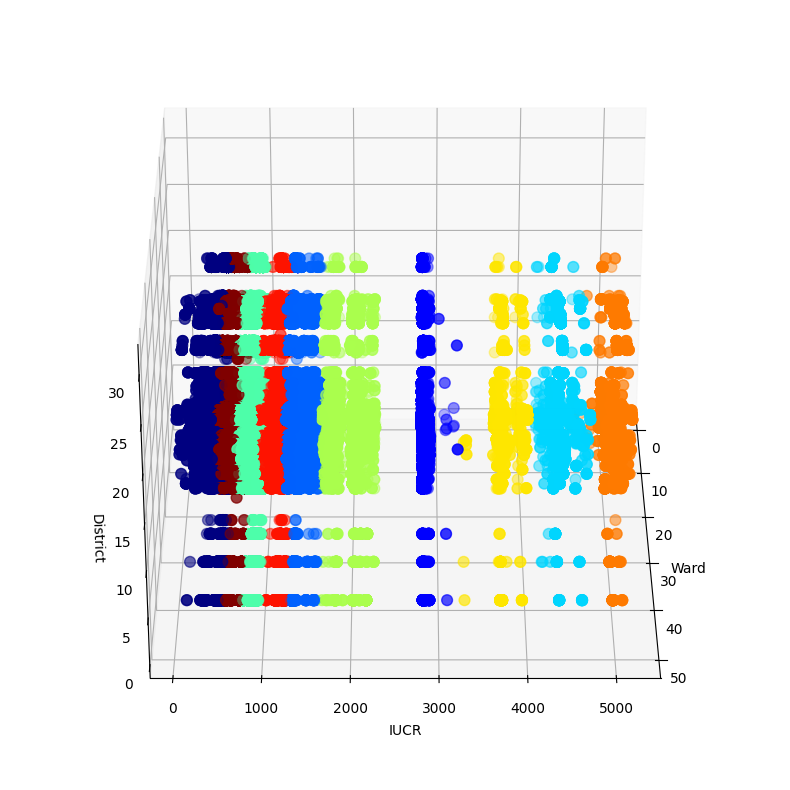

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

### Question 5:
 What do you notice when running k-means without normalisation? Why?

 a. The clusters are entirely based on the Euclidean distance between the IUCRs. This is because the scale of this variable is much bigger than the others.

 b. The clusters are evenly influenced by all features, regardless of their scale.

 c. Normalisation causes the clusters to collapse into a single point.

 d. K-means automatically adjusts for feature scale, so normalisation has no effect.

Set the value of `ans5` to 'a', 'b', 'c' or 'd' depending on your answer.

In [18]:
### GRADED CELL
ans5 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans5 = 'a'


### k-means clustering with normalisation

As expected, k-means without normalisation doesn't work very well. You can fix this by normalising the data.
    


You start by normalising the data.

In the code cell below, you have normalised the column `IUCR` using the formula:

$$y_\text{norm} = \frac{y - \min(y)}{\max(y) - \min(y)}$$

In [19]:
sub_df.loc[:, 'IUCR'] = (sub_df['IUCR'] - sub_df['IUCR'].min())/(sub_df['IUCR'].max()-sub_df['IUCR'].min())


Execute the code cell below to normalise the columns `Ward` and `District` following the example given above.

In [20]:

# Normalize Ward
sub_df['Ward'] = ((sub_df['Ward'] - sub_df['Ward'].min()) /
                  (sub_df['Ward'].max() - sub_df['Ward'].min())).astype(float)

# Normalize District
sub_df['District'] = ((sub_df['District'] - sub_df['District'].min()) /
                      (sub_df['District'].max() - sub_df['District'].min())).astype(float)


Without normalising the data, the best number of clusters is around four, so try that out!

Complete the code cell below by following these steps:
- Use `KMeans()` to compute the k-mean `km` when using ten clusters.
- Use the `fit()` method to perform the k-means clustering on `sub_df`.
- Use the `km` method `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [21]:
# Drop rows with NaN values as a temporary fix
sub_df_cleaned = sub_df.dropna()

km = KMeans(n_clusters=10, random_state=42, n_init=10) 
km.fit(sub_df_cleaned)
predictions = km.predict(sub_df_cleaned)
labels = km.labels_

Run the code cell below to visualise the clusters obtained without normalisation. You can change the value in `ax.view_init(azim=90)` to rotate the plot.

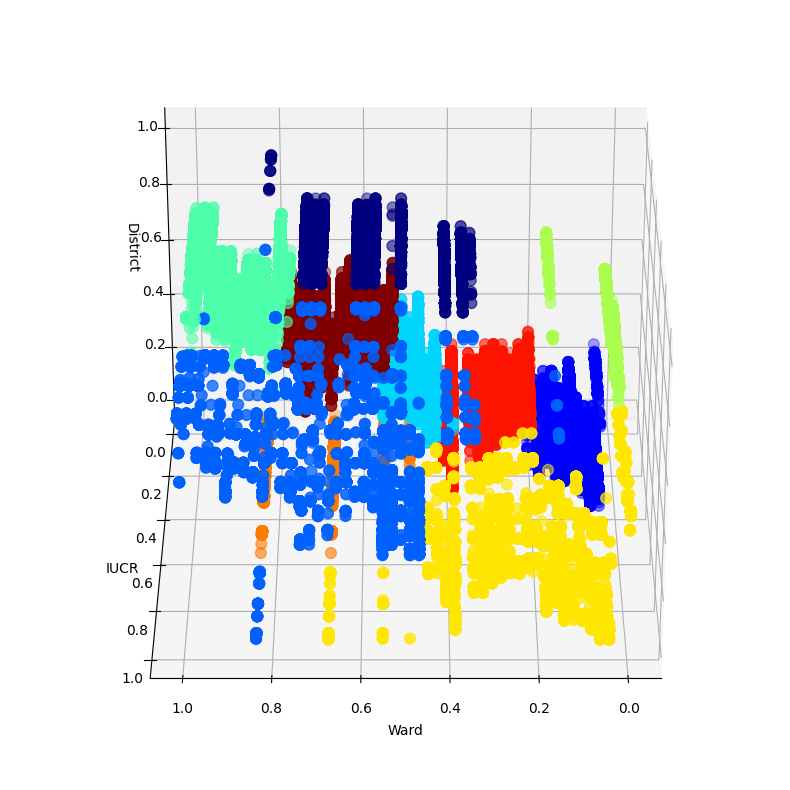

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

### Question 6:
How do the clusters change when the data is normalised?

a. The clusters become more random and less interpretable.

b. The clusters are no longer based on just the IUCRs. Instead, the ward and district seem to be much more important.

c. Normalisation removes all variation, so clustering fails.

d. The clusters remain exactly the same as before normalisation.

Set the value of `ans6` to 'a', 'b', 'c' or 'd' depending on your answer.

In [30]:
###GRADED CELL
ans6 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans6 = 'b'


### Using the elbow rule

To find the **optimal number of clusters**, you will go with the elbow rule, which states that on the curve of score versus the number of clusters, the optimal point is where the first bend (or *elbow*) occurs because after that, the score eventually decreases to zero and each point starts behaving as its own cluster.

Next, to reproduce the elbow chart, you need to compute the score for each number of clusters.

First, you need a list of models defined for a varying number of clusters. Then, you can fit each model on the data to get a score for the model and determine the model with the best number of clusters.

### Question 7:
Complete the for loop in the code cell below to compute the k-means for the given range of values. This for loop returns a list of `Kmeans` model objects, each of which has a different number of clusters ranging from 1 to 20.

In [31]:
### GRADED CELL

# Initialize the list for Kmeans models
kmeans = []

# Create a range of cluster counts
N = range(1, 20)

# YOUR CODE HERE
#raise NotImplementedError()

for i in N:
    kmeans.append(KMeans(n_clusters=i, random_state=42, n_init=10))

Next, compute the score. Run the code cell below.


In [32]:
score = []
# Drop rows with NaN values for fitting and scoring
sub_df_cleaned = sub_df.dropna()
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(sub_df_cleaned).score(sub_df_cleaned))

Finally, plot your new elbow curve. Run the code below to plot the elbow curve.

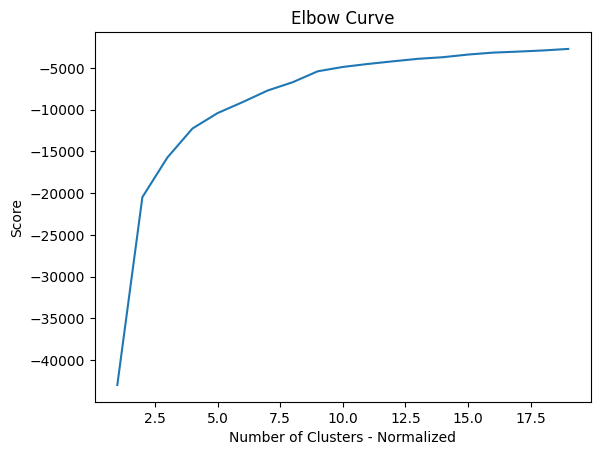

In [33]:
pl.plot(N,score)
pl.xlabel('Number of Clusters - Normalized')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Question 8:
What does the optimal number of clusters seem to be using the elbow rule?

a. 3

b. 4

c. 5

d. 8

Enter your answer to `ans8`.


In [34]:
### GRADED CELL
ans8 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans8 = 'c'

Execute the code cell below by following these steps:
- Use `KMeans()` to compute the optimal k-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute k-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [35]:
# Drop rows with NaN values as a temporary fix
sub_df_cleaned = sub_df.dropna()

km = KMeans(n_clusters=4, random_state=42, n_init=10) # Added random_state and n_init for reproducibility
km.fit(sub_df_cleaned)
y = km.predict(sub_df_cleaned)
labels_norm = km.labels_
# Drop rows with NaN values and create a copy
sub_df_cleaned = sub_df.dropna().copy()

km = KMeans(n_clusters=2, random_state=42, n_init=10)
km.fit(sub_df_cleaned)
y = km.predict(sub_df_cleaned)
labels_norm = km.labels_

# Use .loc for assignment to avoid warning
sub_df_cleaned.loc[:, 'Clusters_norm'] = y

print(sub_df_cleaned.head())


       Ward      IUCR  District  Clusters_norm
0  0.326531  0.069693  0.166667              0
1  0.142857  0.074871  0.100000              0
2  0.183673  0.069693  0.133333              0
3  0.469388  0.068499  0.300000              0
4  0.918367   0.06372  0.600000              1


The points are assigned to two clusters 0 and 1. 

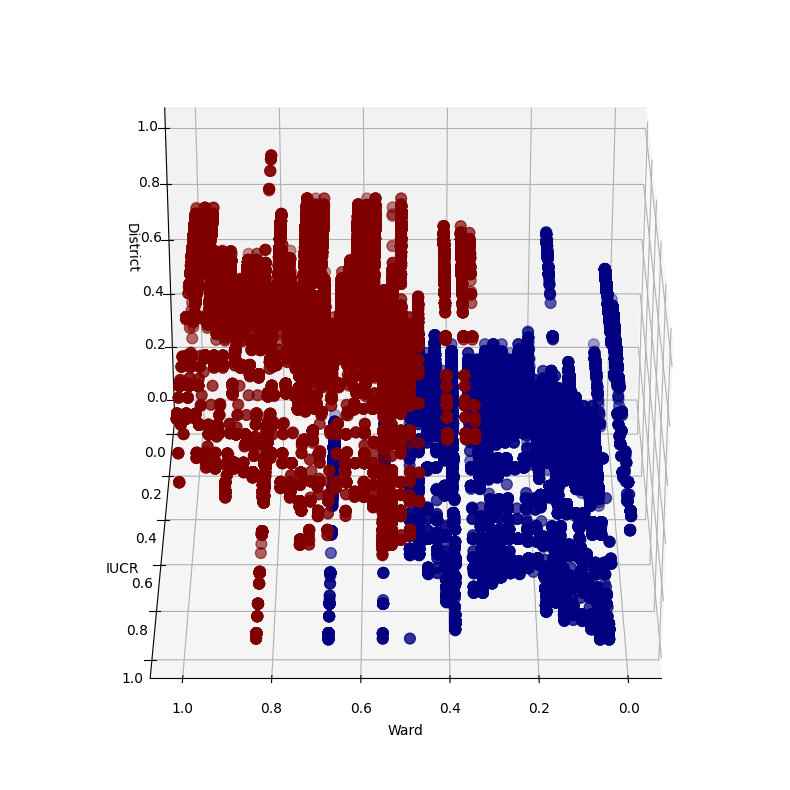

In [36]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Use sub_df_cleaned for plotting, as it contains the cluster labels and has no NaNs
x = np.array(sub_df_cleaned['Ward'])
y = np.array(sub_df_cleaned['IUCR'])
z = np.array(sub_df_cleaned['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

# Use the 'Clusters_norm' column from sub_df_cleaned for coloring
ax.scatter(x,y,z, marker="o", c = sub_df_cleaned["Clusters_norm"], s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

Congratulations you've completed this notebook!
